# Build Visualizations for Rating Evaluation


In [18]:
# Get role and person to compare
role_id = 22
#person_id = 5
#person_id_1 = 11
#person_id_2 = 11
#person_id_3 = 10

## Import Libraries

In [19]:
import pandas as pd
import numpy as np

## Get Role Data

In [20]:
# Get the role from the collected data from the survey
role = pd.read_csv(filepath_or_buffer="../2-data/survey_roles.csv", sep=",", encoding="latin1")
role = role[role['id']==role_id]
role_skills = role['skills'].values[0].split(';')
role_experience = role['explevel'].values[0]

print(role_id)
print(role_skills)
print(role_experience)

22
['JavaScript', 'PostgreSQL', 'jQuery', 'React.js', 'React Native', 'Docker', 'Kubernetes']
Associate


In [21]:
# Tokenize the skills
role['skills'] = role['skills'].apply(lambda x: x.split(';'))
#role['skills'] = role['skills'].apply(set)

role

,id,skills,explevel,name
6,22,"[JavaScript, PostgreSQL, jQuery, React.js, Rea...",Associate,Software Engineer - Frontend


In [22]:
df_role_skills = role.explode('skills')[['id', 'skills']]
df_role_skills['skills'] = df_role_skills['skills'].str.strip()
#df_role_skills['source'] = 'role-skills'
df_role_skills

,id,skills
6,22,JavaScript
6,22,PostgreSQL
6,22,jQuery
6,22,React.js
6,22,React Native
6,22,Docker
6,22,Kubernetes


# Get Employees Data

In [23]:
# Read the employees dataset - from the data entered in the survey
df_people = pd.read_csv(filepath_or_buffer=f"../6-results/ranking_role_{role_id}.csv", sep=",", encoding="latin1")


#df_people = df_people[(df_people['id']==person_id_1) | (df_people['id']==person_id_2) | (df_people['id']==person_id_3)]

# Tokenize the skills
df_people['skills'] = df_people['skills'].apply(lambda x: x.replace("'", ""))
df_people['skills'] = df_people['skills'].apply(lambda x: x.replace("[", ""))
df_people['skills'] = df_people['skills'].apply(lambda x: x.replace("]", ""))

df_people['skills'] = df_people['skills'].apply(lambda x: x.split(','))
#df_people['skills'] = df_people['skills'].apply(set)

df_people['skills-want'] = df_people['skills-want'].apply(lambda x: x.replace("'", ""))
df_people['skills-want'] = df_people['skills-want'].apply(lambda x: x.replace("[", ""))
df_people['skills-want'] = df_people['skills-want'].apply(lambda x: x.replace("]", ""))
df_people['skills-want'] = df_people['skills-want'].apply(lambda x: x.split(','))
#df_people['skills-want'] = df_people['skills-want'].apply(set)

person_id_1 = df_people['id'][0]
person_id_2 = df_people['id'][1]
person_id_3 = df_people['id'][2]
person_id_4 = df_people['id'][3]
person_id_5 = df_people['id'][4]

person_id_1_rank_model_1 = df_people['rank-model1'][0]
person_id_2_rank_model_1 = df_people['rank-model1'][1]
person_id_3_rank_model_1 = df_people['rank-model1'][2]
person_id_4_rank_model_1 = df_people['rank-model1'][3]
person_id_5_rank_model_1 = df_people['rank-model1'][4]

person_id_1_rank_model_2 = df_people['rank-model2'][0]
person_id_2_rank_model_2 = df_people['rank-model2'][1]
person_id_3_rank_model_2 = df_people['rank-model2'][2]
person_id_4_rank_model_2 = df_people['rank-model2'][3]
person_id_5_rank_model_2 = df_people['rank-model2'][4]

person_id_1_rank_model_3 = df_people['rank-model3'][0]
person_id_2_rank_model_3 = df_people['rank-model3'][1]
person_id_3_rank_model_3 = df_people['rank-model3'][2]
person_id_4_rank_model_3 = df_people['rank-model3'][3]
person_id_5_rank_model_3 = df_people['rank-model3'][4]
# Get only required columns
df_people = df_people[['id', 'skills', 'skills-want']]

df_people


,id,skills,skills-want
0,57614,"[C#, Microsoft SQL Server, Microsoft Azure, ...","[C#, Java, Microsoft SQL Server, AWS, Reac..."
1,55249,"[C, C++, HTML/CSS, Java]","[C, C++, HTML/CSS, JavaScript, Python, Ty..."
2,29895,"[Bash/Shell, C++, HTML/CSS, JavaScript, Ko...","[JavaScript, Kotlin, Lua, PowerShell, Pyth..."
3,10636,"[Dart, Go, HTML/CSS, Java, JavaScript, Py...","[Go, HTML/CSS, JavaScript, Python, SQL, T..."
4,64550,"[Bash/Shell, Groovy, Java, JavaScript, Pow...","[Bash/Shell, Dart, PowerShell, Python, SQL..."


In [24]:
df_person_skills = df_people.explode('skills')[['id', 'skills']]
df_person_skills['skills'] = df_person_skills['skills'].str.strip()
df_person_skills#['source'] = 'person-skills'


,id,skills
0,57614,C#
0,57614,Microsoft SQL Server
0,57614,Microsoft Azure
0,57614,Angular
0,57614,Angular.js
...,...,...
4,64550,Torch/PyTorch
4,64550,Chef
4,64550,Docker
4,64550,Kubernetes


In [25]:
df_person_interests = df_people.explode('skills-want')[['id', 'skills-want']]
df_person_interests['skills'] = df_person_interests['skills-want']
#df_person_interests['source'] = 'person-interests'
#df_person_interests = df_person_interests[['id', 'skills', 'source']]
df_person_interests = df_person_interests[['id', 'skills']]
df_person_interests['skills'] = df_person_interests['skills'].str.strip()
df_person_interests


,id,skills
0,57614,C#
0,57614,Java
0,57614,Microsoft SQL Server
0,57614,AWS
0,57614,React.js
...,...,...
4,64550,Hugging Face Transformers
4,64550,Ansible
4,64550,Docker
4,64550,Kubernetes


# Compute Number for each combination

In [26]:
from sqlalchemy import create_engine

def create_table(name, df):
    # Create a connection to the database
    engine = create_engine('sqlite:///database.db')

    # Load the DataFrame into a table
    df.to_sql(f'{name}', engine, if_exists='replace', index=False)

    # Close the database connection
    engine.dispose()

create_table('person_skills', df_person_skills)
create_table('person_interests', df_person_interests)
create_table('role_skills', df_role_skills)


In [27]:
def query_database(sql):
    # Create a connection to the database
    engine = create_engine('sqlite:///database.db')

    # Query the data
    query = sql
    result = engine.execute(query)

    # Fetch all the rows from the result object
    rows = result.fetchall()

    # Convert the rows to a DataFrame
    df_result = pd.DataFrame(rows, columns=result.keys())

    # Close the database connection
    engine.dispose()

    return df_result


In [28]:
# Get total number of skills in the role
result = query_database("""
    select skills from role_skills
""")
result
all_skills = result.count()[0]
all_skills

7

In [29]:
def compute_matched_skills_only(person):
    # Get skills only
    result = query_database(f"""
        select rs.skills from role_skills rs, person_skills ps 
        where rs.skills = ps.skills and ps.id = {person} and rs.skills not in (
            select skills from person_interests where id = {person});
        """)
    result
    matched_skills_only = result.count()[0]
    return matched_skills_only



def compute_matched_skills_and_interests(person):
    
    # Get skills and interests
    result = query_database(f"""
        select rs.skills from role_skills rs, person_skills ps where rs.skills = ps.skills and ps.id = {person} and rs.skills in (select skills from person_interests where id = {person});
        """)
    result
    matched_skills_and_interests = result.count()[0]
    return matched_skills_and_interests


def compute_matched_interests_only(person):
    # Get interests only
    result = query_database(f"""
        select rs.skills from role_skills rs, person_interests pi where rs.skills = pi.skills and pi.id = {person} and rs.skills not in (select skills from person_skills where id = {person});
        """)
    result
    matched_interests_only = result.count()[0]
    return matched_interests_only



def compute_skills_not_matched(person):
    # Get skills not matched on neither skills nor interests
    result = query_database(f"""
        select rs.skills from role_skills rs where rs.skills not in (select skills from person_skills where id = {person}) and rs.skills not in (select skills from person_interests where id = {person}) ;
        """)
    result
    skills_not_matched = result.count()[0]
    return skills_not_matched




In [30]:

#print(compute_matched_skills_only(person_id_1))
#print(compute_matched_skills_and_interests(person_id_1))
#print(compute_matched_interests_only(person_id_1))
#print(compute_skills_not_matched(person_id_1))

# See Results

In [31]:
#print("Total Number of Skills:", all_skills)
#print("Skills only:", matched_skills_only)
#print("Skills and Interests:", matched_skills_and_interests)
#print("Interests only:", matched_interests_only)
#print("Skills not Matched:", skills_not_matched)


In [32]:
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'Category': [f'{person_id_1}', f'{person_id_2}', f'{person_id_3}', f'{person_id_4}', f'{person_id_5}'],
    'Matched by Skills only': [compute_matched_skills_only(person_id_1), compute_matched_skills_only(person_id_2), compute_matched_skills_only(person_id_3), compute_matched_skills_only(person_id_4), compute_matched_skills_only(person_id_5)],
    'Matched by Skills and Interests': [compute_matched_skills_and_interests(person_id_1), compute_matched_skills_and_interests(person_id_2), compute_matched_skills_and_interests(person_id_3), compute_matched_skills_and_interests(person_id_4), compute_matched_skills_and_interests(person_id_5)],
    'Matched by Interests only': [compute_matched_interests_only(person_id_1), compute_matched_interests_only(person_id_2), compute_matched_interests_only(person_id_3), compute_matched_interests_only(person_id_4), compute_matched_interests_only(person_id_5)],
    'Skills not Matched': [compute_skills_not_matched(person_id_1), compute_skills_not_matched(person_id_2), compute_skills_not_matched(person_id_3), compute_skills_not_matched(person_id_4), compute_skills_not_matched(person_id_5)],
    'rank-model1': [person_id_1_rank_model_1, person_id_2_rank_model_1, person_id_3_rank_model_1, person_id_4_rank_model_1, person_id_5_rank_model_1],
    'rank-model2': [person_id_1_rank_model_2, person_id_2_rank_model_2, person_id_3_rank_model_2, person_id_4_rank_model_2, person_id_5_rank_model_2],
    'rank-model3': [person_id_1_rank_model_3, person_id_2_rank_model_3, person_id_3_rank_model_3, person_id_4_rank_model_3, person_id_5_rank_model_3],
}
df = pd.DataFrame(data)



In [33]:

def show_chart(df, model, legend):
    # Calculate the percentage for each value in each category
    total = df[['Matched by Skills only', 'Matched by Skills and Interests', 'Matched by Interests only', 'Skills not Matched']].sum(axis=1)
    df_percent = df[['Matched by Skills only', 'Matched by Skills and Interests', 'Matched by Interests only', 'Skills not Matched']].div(total, axis=0) * 100

    # Plot the 100% stacked bar chart
    fig, ax = plt.subplots(figsize=(3.5, 6))
    categories = df['Category']
    bar_width = 0.5

    bottom = [0] * len(categories)
    colors = ['#7eb0d5', '#b2e061', '#bd7ebe', '#ffb55a']

    for i, col in enumerate(df_percent.columns):
        values = df_percent[col]
        ax.bar(categories, values, bar_width, bottom=bottom, color=colors[i], label=col)
        bottom += values

    ax.set_ylabel('% of Skill Coverage')
    ax.set_xlabel(f'Person ID')
    ax.set_title(f'Role {role_id} - Model {model}')
    
    if legend:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove the left and bottom spines
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    scale_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Specify the values for horizontal lines
    for value in scale_values:
        ax.axhline(value, color='gray', linestyle='--', linewidth=0.5)

    plt.show()

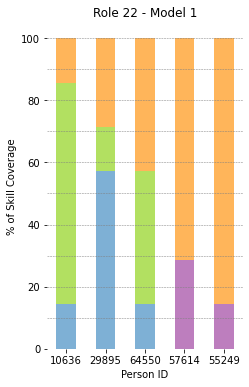

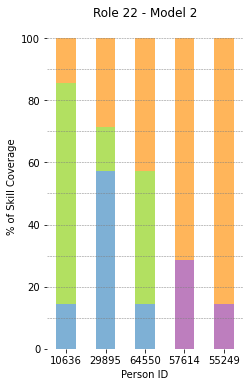

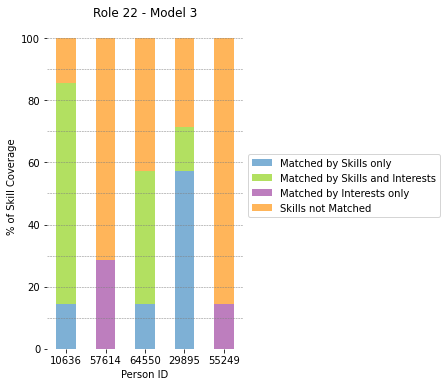

In [34]:
show_chart(df.sort_values(by=['rank-model1'], ascending=True), 1, False)
show_chart(df.sort_values(by=['rank-model2'], ascending=True), 2, False)
show_chart(df.sort_values(by=['rank-model3'], ascending=True), 3, True)



In [437]:
# Save chart
#plt.savefig(f'rating_role_{role_id}.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>